This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status





The goal is to predict the Loan Status of an applicant with provided indepentend variables.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

As seen multiple variables are object type and few are numeric i.e. float.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From count analysis we can understand that there are missing values in the dataset.
Mean values indicate the average of all values under that variable, for example average Applicant income amoung all the applicats is 5403.45.
And so on there are minimum and maximum values for each varaiable, Minimum Loan Amount requested is 100.0 and Maximum is 700.0

# Checking for Null Values

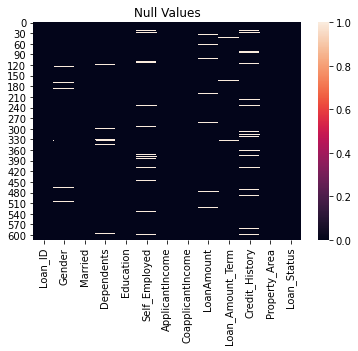

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Visualisation

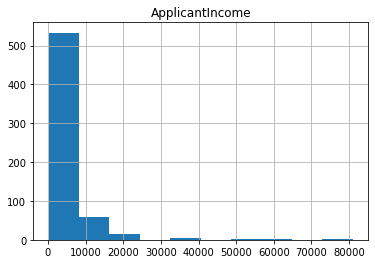

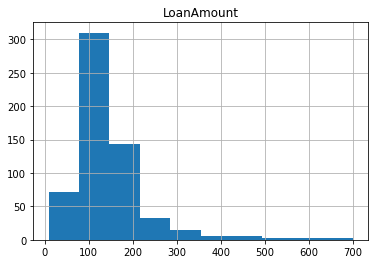

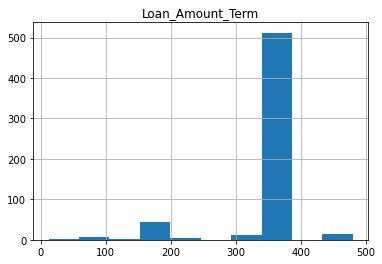

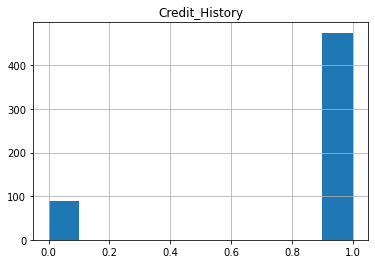

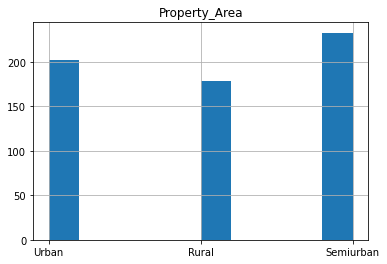

In [10]:
index=['ApplicantIncome', 'LoanAmount' , 'Loan_Amount_Term', 'Credit_History' ,  'Property_Area'   ]

for i in index:
    df[i].hist(grid=True)
    plt.title(i)
    plt.show()

Observations:
    
    Most applicant incomes are less than 10,000.
    Most loan amounts fall between 90 to 140.
    Most applicants reside in semi-urban settelments,  Around 240 and Rural settelments have least applicant about 175.

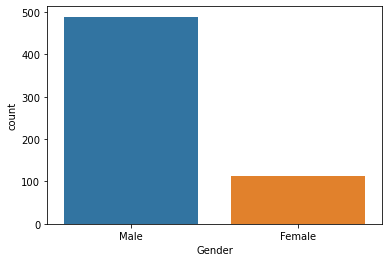

In [13]:
sns.countplot(x='Gender', data = df)
plt.show()

There are 490 Male and around 110 Female applicants.

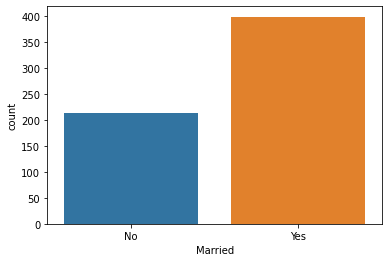

In [14]:
sns.countplot(x='Married', data = df)
plt.show()

Around 400 applicants are Married and 210 and Unmarried. 

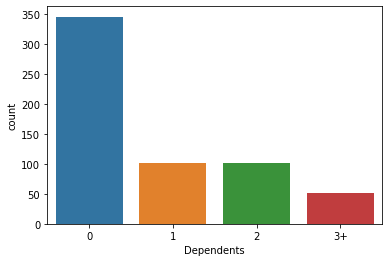

In [19]:
sns.countplot(x='Dependents', data = df)
plt.show()

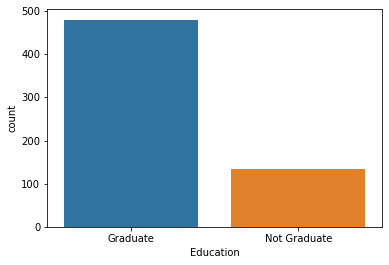

In [25]:
sns.countplot(x='Education', data = df)
plt.show()

Around 480 applicants are Graduate and 150 Applicants are Not Graduate.

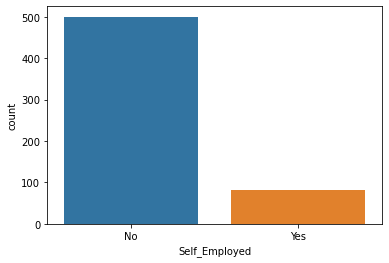

In [26]:
sns.countplot(x='Self_Employed', data = df)
plt.show()

Around 500 Applicants are Not Self-Employed abd around 80-90 applicants are Self-Employed.

# Encoding the data

In [32]:
df.dropna(inplace=True)

In [ ]:
NaN Values been droped.

In [34]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

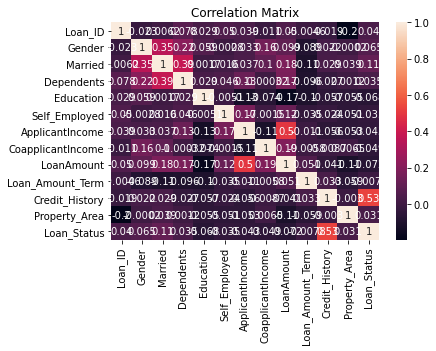

In [36]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Due to high no of rows its difficult to read the heat map.

In [37]:
corr_matrix=df.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.529390
Married              0.112321
Gender               0.064504
Loan_ID              0.040080
Dependents           0.035428
Property_Area        0.031361
Loan_Amount_Term    -0.007798
Self_Employed       -0.034715
ApplicantIncome     -0.043152
CoapplicantIncome   -0.049020
Education           -0.068437
LoanAmount          -0.071753
Name: Loan_Status, dtype: float64

Variable Credit History is highly Correlated whereas Loan Amount is least correlated with the Target Variable.

# Checking for outliers

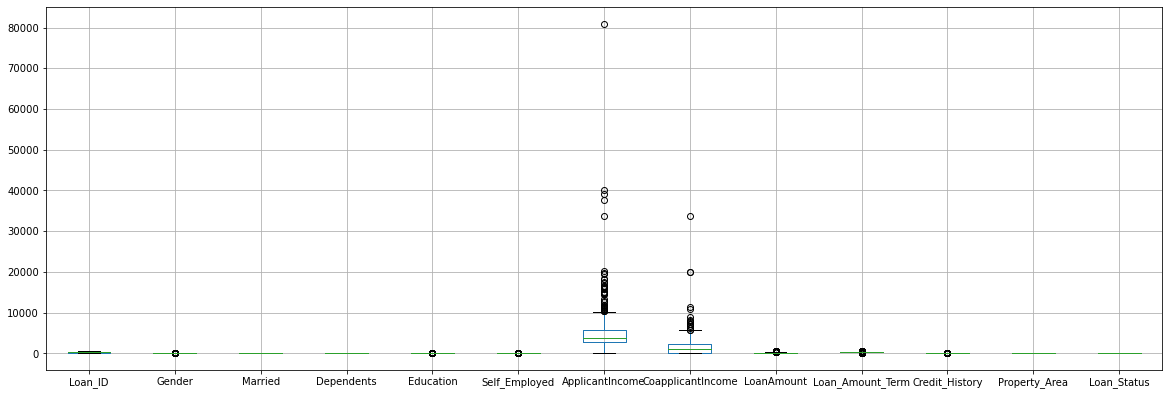

In [38]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

There are certain outliers present in Applicant Income and Co-Applicant Income but considering the nature of gthe variables it can be accepted.

In [40]:
df.skew()

Loan_ID             -0.000692
Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

Keeping +/-(0.5) as the range of skewness. Certain columns are not following the range of skewness.

In [41]:
x=df.drop('Loan_Status', axis =1)
y=df['Loan_Status']

In [42]:
from sklearn.preprocessing import power_transform
df.new=power_transform(x)

df.new=pd.DataFrame(df.new,columns=x.columns)

In [43]:
df.new.skew()

Loan_ID             -0.285838
Gender              -1.678471
Married             -0.621334
Dependents           0.391653
Education            1.488474
Self_Employed        2.111872
ApplicantIncome     -0.112745
CoapplicantIncome   -0.127432
LoanAmount           0.044294
Loan_Amount_Term     0.400696
Credit_History      -2.013253
Property_Area       -0.147170
dtype: float64

In [44]:
x=df.new

# Finding Best Random State

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state =i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)
    predlr=LR.predict(x_test) 
    acc=accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

In [47]:
print("Best accuracy is ", maxAccu," on Random_state ", maxRS)

Best accuracy is  0.875  on Random_state  14


# Creating train test split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=14)

In [49]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.875
[[ 20  18]
 [  0 106]]
              precision    recall  f1-score   support

         0.0       1.00      0.53      0.69        38
         1.0       0.85      1.00      0.92       106

    accuracy                           0.88       144
   macro avg       0.93      0.76      0.81       144
weighted avg       0.89      0.88      0.86       144



In [50]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7291666666666666
[[21 17]
 [22 84]]
              precision    recall  f1-score   support

         0.0       0.49      0.55      0.52        38
         1.0       0.83      0.79      0.81       106

    accuracy                           0.73       144
   macro avg       0.66      0.67      0.67       144
weighted avg       0.74      0.73      0.73       144



In [51]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8611111111111112
[[ 21  17]
 [  3 103]]
              precision    recall  f1-score   support

         0.0       0.88      0.55      0.68        38
         1.0       0.86      0.97      0.91       106

    accuracy                           0.86       144
   macro avg       0.87      0.76      0.79       144
weighted avg       0.86      0.86      0.85       144



In [52]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.875
[[ 21  17]
 [  1 105]]
              precision    recall  f1-score   support

         0.0       0.95      0.55      0.70        38
         1.0       0.86      0.99      0.92       106

    accuracy                           0.88       144
   macro avg       0.91      0.77      0.81       144
weighted avg       0.89      0.88      0.86       144



# Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : 0.80625


In [55]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc, x, y, cv=5)
print('Cross validation score of DecisionTreeClassifier model :',scr.mean())

Cross validation score of DecissionTreeClassifier model : 0.7041666666666667


In [56]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.8104166666666668


In [57]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc, x, y, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.8208333333333332


Minimum difference in accuracy and cross validation is for DecisionTreeClassifier model. Hence DecisionTreeClassifier is our best model.

# Hyper Parameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters= {'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [68]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [70]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [71]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [72]:
accuracy_score(y_test,GCV_pred)

0.8194444444444444

In [73]:
import pickle 
filename = 'Loan_Prediction.pkl'
pickle.dump(rf, open( filename, 'wb' ))